# Backpropagation

# Backpropagation
Het backpropagation algoritme bestaat uit twee fasen:
* Forward pass
* Backward pass

We bekijken deze twee fasen a.d.h.v. een heel eenvoudig neuraal netwerk dat hieronder is afgebeeld.

<img src="https://i.imgur.com/RMGc61x.png" width="50%"/>

## Opbouw van het netwerk

Normaal gesproken bouw je neurale netwerken met een library zoals Keras. Om het backpropagation algoritme te demonstreren, gaan we eerst alles een keer handmatig opbouwen.

### Input en output

In [13]:
import numpy as np

x = np.array([0.3, 0.4, 0.8, 0.9, 0.2, 0.2, 0.5])
y = np.array([0, 1, 0])

### Gewichten

In [14]:
!pip install tabulate


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
from IPython.display import display, Markdown, HTML

W1 = np.array([f'$$w^1_{{{i},{j}}}$$' for i in range(1, 8) for j in range(1, 6)]).reshape(7, -1)

W1 = pd.DataFrame(W1, columns=[f'<font color=orange>$\hspace{{1cm}}z^1_{i}\hspace{{1cm}}$</font>' for i in range(1, 6)],
                  index=[f'<font color=blue>$a^0_{i}$</font>' for i in range(1, 8)])

Markdown(W1.to_markdown())

|                                 | <font color=orange>$\hspace{1cm}z^1_1\hspace{1cm}$</font>   | <font color=orange>$\hspace{1cm}z^1_2\hspace{1cm}$</font>   | <font color=orange>$\hspace{1cm}z^1_3\hspace{1cm}$</font>   | <font color=orange>$\hspace{1cm}z^1_4\hspace{1cm}$</font>   | <font color=orange>$\hspace{1cm}z^1_5\hspace{1cm}$</font>   |
|:--------------------------------|:------------------------------------------------------------|:------------------------------------------------------------|:------------------------------------------------------------|:------------------------------------------------------------|:------------------------------------------------------------|
| <font color=blue>$a^0_1$</font> | $$w^1_{1,1}$$                                               | $$w^1_{1,2}$$                                               | $$w^1_{1,3}$$                                               | $$w^1_{1,4}$$                                               | $$w^1_{1,5}$$                                               |
| <font color=blue>$a^0_2$</font> | $$w^1_{2,1}$$                                               | $$w^1_{2,2}$$                                               | $$w^1_{2,3}$$                                               | $$w^1_{2,4}$$                                               | $$w^1_{2,5}$$                                               |
| <font color=blue>$a^0_3$</font> | $$w^1_{3,1}$$                                               | $$w^1_{3,2}$$                                               | $$w^1_{3,3}$$                                               | $$w^1_{3,4}$$                                               | $$w^1_{3,5}$$                                               |
| <font color=blue>$a^0_4$</font> | $$w^1_{4,1}$$                                               | $$w^1_{4,2}$$                                               | $$w^1_{4,3}$$                                               | $$w^1_{4,4}$$                                               | $$w^1_{4,5}$$                                               |
| <font color=blue>$a^0_5$</font> | $$w^1_{5,1}$$                                               | $$w^1_{5,2}$$                                               | $$w^1_{5,3}$$                                               | $$w^1_{5,4}$$                                               | $$w^1_{5,5}$$                                               |
| <font color=blue>$a^0_6$</font> | $$w^1_{6,1}$$                                               | $$w^1_{6,2}$$                                               | $$w^1_{6,3}$$                                               | $$w^1_{6,4}$$                                               | $$w^1_{6,5}$$                                               |
| <font color=blue>$a^0_7$</font> | $$w^1_{7,1}$$                                               | $$w^1_{7,2}$$                                               | $$w^1_{7,3}$$                                               | $$w^1_{7,4}$$                                               | $$w^1_{7,5}$$                                               |

In [16]:
import pandas as pd

np.random.seed(42)

W1 = np.round(np.random.normal(0, 1, size=(7, 5)), 2)
W2 = np.round(np.random.normal(0, 1, size=(5, 3)), 2)
np.set_printoptions(suppress=True, precision=4)
W1 = pd.DataFrame(W1,
                  columns=[f'<font color=orange>$\hspace{{0.3cm}}z^1_{i}\hspace{{0.3cm}}$</font>' for i in range(1, 6)],
                  index=[f'<font color=blue>$a^0_{i}$</font>' for i in range(1, 8)])
display(HTML("<h3>Weights W1</h3>"))
display(Markdown(W1.to_markdown()))

W2 = pd.DataFrame(W2,
                  columns=[f'<font color=orange>$\hspace{{0.3cm}}z^1_{i}\hspace{{0.3cm}}$</font>' for i in range(1, 4)],
                  index=[f'<font color=blue>$a^0_{i}$</font>' for i in range(1, 6)])
display(HTML("<h3>Weights W2</h3>"))
display(Markdown(W2.to_markdown()))

|                                 |   <font color=orange>$\hspace{0.3cm}z^1_1\hspace{0.3cm}$</font> |   <font color=orange>$\hspace{0.3cm}z^1_2\hspace{0.3cm}$</font> |   <font color=orange>$\hspace{0.3cm}z^1_3\hspace{0.3cm}$</font> |   <font color=orange>$\hspace{0.3cm}z^1_4\hspace{0.3cm}$</font> |   <font color=orange>$\hspace{0.3cm}z^1_5\hspace{0.3cm}$</font> |
|:--------------------------------|----------------------------------------------------------------:|----------------------------------------------------------------:|----------------------------------------------------------------:|----------------------------------------------------------------:|----------------------------------------------------------------:|
| <font color=blue>$a^0_1$</font> |                                                            0.5  |                                                           -0.14 |                                                            0.65 |                                                            1.52 |                                                           -0.23 |
| <font color=blue>$a^0_2$</font> |                                                           -0.23 |                                                            1.58 |                                                            0.77 |                                                           -0.47 |                                                            0.54 |
| <font color=blue>$a^0_3$</font> |                                                           -0.46 |                                                           -0.47 |                                                            0.24 |                                                           -1.91 |                                                           -1.72 |
| <font color=blue>$a^0_4$</font> |                                                           -0.56 |                                                           -1.01 |                                                            0.31 |                                                           -0.91 |                                                           -1.41 |
| <font color=blue>$a^0_5$</font> |                                                            1.47 |                                                           -0.23 |                                                            0.07 |                                                           -1.42 |                                                           -0.54 |
| <font color=blue>$a^0_6$</font> |                                                            0.11 |                                                           -1.15 |                                                            0.38 |                                                           -0.6  |                                                           -0.29 |
| <font color=blue>$a^0_7$</font> |                                                           -0.6  |                                                            1.85 |                                                           -0.01 |                                                           -1.06 |                                                            0.82 |

|                                 |   <font color=orange>$\hspace{0.3cm}z^1_1\hspace{0.3cm}$</font> |   <font color=orange>$\hspace{0.3cm}z^1_2\hspace{0.3cm}$</font> |   <font color=orange>$\hspace{0.3cm}z^1_3\hspace{0.3cm}$</font> |
|:--------------------------------|----------------------------------------------------------------:|----------------------------------------------------------------:|----------------------------------------------------------------:|
| <font color=blue>$a^0_1$</font> |                                                           -1.22 |                                                            0.21 |                                                           -1.96 |
| <font color=blue>$a^0_2$</font> |                                                           -1.33 |                                                            0.2  |                                                            0.74 |
| <font color=blue>$a^0_3$</font> |                                                            0.17 |                                                           -0.12 |                                                           -0.3  |
| <font color=blue>$a^0_4$</font> |                                                           -1.48 |                                                           -0.72 |                                                           -0.46 |
| <font color=blue>$a^0_5$</font> |                                                            1.06 |                                                            0.34 |                                                           -1.76 |

### Neuronen met sigmoid activatiefuncties

Elk neuron $j$ van een laag berekent allereerst het gewogen gemiddelde ($z_j$) van zijn binnenkomende gewogen ($w_i$) inputs ($a_i$) van het neuron.

$$z_j = \sum_i {w_i \cdot a_i}$$

De neuronen bevatten ook zogenaamde activatiefuncties. In ons voorbeeld gebruiken we de sigmoidactivatiefunctie. Deze functie wordt toegepast op de $z_j$ om zo de output te genereren $a_j$ van het neuron.

$a_j=\sigma(z_j) = \frac{1}{1+e^{-z_j}}$ met $e^x$ de exponentiële functie met grondtal $e$

Hieronder zie je de sigmoidcurve en de afgeleide functie ervan.

<img src="https://miro.medium.com/max/1838/1*a04iKNbchayCAJ7-0QlesA.png" width="40%"/>

$\sigma'(z) = \sigma(z)(1-\sigma(z))$

<img src="https://i.stack.imgur.com/inMoa.png" width="20%"/>

*Nota: De afgeleide van de sigmoid functie $\sigma'(z)$ heeft de 'eigenaardige' eigenschap dat zelf te schrijven is m.b.v. van $\sigma(z)$. Dit maakt de wiskundige analyse van een het backpropagation algoritme makkelijker.*

We schrijven nu twee Python functies die deze twee wiskundige functies voorstellen. Omdat we Numpy arrays gebruiken, werken deze functies op een hele laag van het neurale netwerk. Je kan ze dus toepassen op een reeks van inputs en dan krijg je ook een reeks van outputs. Prime (p) is Engelse benaming voor de afgeleide van een functie vandaar onze keuze voor de naam van die functie.

In [17]:
def g(z: np.ndarray):
    return 1 / (1 + np.exp(-z))


def g_p(z: np.ndarray):
    return g(z) * (1 - g(z))


z = np.array([0.3])
print(g(z))

z = np.array([-3, -2, -1, 0, 1, 2])
print(g(z).reshape(-1, 1))
g_p(np.array([-3, -2, -1, 0, 1, 2, 3])).reshape(-1, 1)

[0.5744]
[[0.0474]
 [0.1192]
 [0.2689]
 [0.5   ]
 [0.7311]
 [0.8808]]


array([[0.0452],
       [0.105 ],
       [0.1966],
       [0.25  ],
       [0.1966],
       [0.105 ],
       [0.0452]])

# Forward pass

Tijdens de forward pass wordt de input doorheen het netwerk gestuurd, zodat het netwerk een output *berekent* voor die input.  Het "doorheen sturen" komt in feite gewoon neer op het berekenen van enkele matrix-operaties. 

<img src="https://i.imgur.com/RMGc61x.png" width="20%"/>

In [18]:
# forward pass
a0 = x
z1 = np.dot(a0, W1)  # (W1 * a0).sum(axis=0)
a1 = g(z1)
z2 = np.dot(a1, W2)  # (W2 * a1).sum(axis=0)
a2 = g(z2)
import itertools

z1 = np.round(z1, 4)
a1 = np.round(a1, 4)
z2 = np.round(z2, 4)
a2 = np.round(a2, 4)

print(f'a0,\t\tz1,\ta1,\t\tz2,\ta2')
for (a, b, c, d, e) in itertools.zip_longest(a0, z1, a1, z2, a2):
    print(f'{a},\t\t{b},\t{c},\t\t{d},\t{e}')

a0,		z1,	a1,		z2,	a2
0.3,		-0.798,	0.3105,		-0.8709,	0.2951
0.4,		-0.046,	0.4885,		0.0724,	0.5181
0.8,		1.059,	0.7425,		-0.6585,	0.3411
0.9,		-3.013,	0.0468,		None,	None
0.2,		-2.254,	0.095,		None,	None
0.2,		None,	None,		None,	None
0.5,		None,	None,		None,	None


In [19]:
display(Markdown((W1 * a0.reshape(7, -1)).sum(axis=0).to_markdown()))

|                                                               |      0 |
|:--------------------------------------------------------------|-------:|
| <font color=orange>$\hspace{0.3cm}z^1_1\hspace{0.3cm}$</font> | -0.798 |
| <font color=orange>$\hspace{0.3cm}z^1_2\hspace{0.3cm}$</font> | -0.046 |
| <font color=orange>$\hspace{0.3cm}z^1_3\hspace{0.3cm}$</font> |  1.059 |
| <font color=orange>$\hspace{0.3cm}z^1_4\hspace{0.3cm}$</font> | -3.013 |
| <font color=orange>$\hspace{0.3cm}z^1_5\hspace{0.3cm}$</font> | -2.254 |

In [29]:
(W1 * a0.reshape(7, -1)).sum(axis=0)

array([-0.9068, -0.0708,  1.0597, -3.0166, -2.2733])

In [30]:
np.random.seed(42)
W1 = np.round(np.random.normal(0, 1, size=(7, 5)), 2)

for j in range(5):
    print(f'{sum(a0 * W1[:, j]):.4f}', end=' ')

print()

print("dot")
np.dot(a0, W1)

-0.7980 -0.0460 1.0590 -3.0130 -2.2540 
dot


array([-0.798, -0.046,  1.059, -3.013, -2.254])

# Backward pass

In [22]:
# backward pass

e = a2 - y

d2 = e * g_p(z2)  # formule 1
d1 = np.dot(d2, W2.transpose()) * g_p(z1)  # formule 2

DW1 = np.outer(a0, d1)  # formule 3
DW2 = np.outer(a1, d2)  # formule 3

W1 = W1 + DW1
W2 = W2 + DW2

In [23]:
class BackPropagation:

    def __init__(self, x, y):
        self.a0 = x
        self.y = y
        np.random.seed(42)
        self.W1 = np.random.normal(0, 1, size=(7, 5))
        self.W2 = np.random.normal(0, 1, size=(5, 3))

    def forward_pass(self):
        self.z1 = np.dot(self.a0, self.W1)
        self.a1 = self.g(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.g(self.z2)
        return self.a2

    def backward_pass(self):
        e = self.a2 - self.y
        d2 = e * self.g_p(self.z2)  # formule 1
        d1 = np.dot(d2, self.W2.transpose()) * g_p(self.z1)  # formule 2

        DW1 = np.outer(self.a0, d1)  # formule 3
        DW2 = np.outer(self.a1, d2)  # formule 3

        self.W1 = self.W1 - DW1
        self.W2 = self.W2 - DW2

    def train(self, n_epochs):
        for i in range(n_epochs):
            self.forward_pass()
            self.backward_pass()

    def g(self, z: np.ndarray):
        return 1 / (1 + np.exp(-z))

    def g_p(self, z: np.ndarray):
        return g(z) * (1 - g(z))

In [31]:
x = np.array([0.3, 0.4, 0.8, 0.9, 0.2, 0.2, 0.5])
y = np.array([1, 1, 0])

bp = BackPropagation(x, y)
bp.train(n_epochs=100)
bp.forward_pass()

array([0.9377, 0.9377, 0.0415])

# Keras

# Keras library
Keras is een Python library waarmee je neurale netwerken kan bouwen.

In [25]:
# We moeten op Datalore momenteel downgraden naar Keras 2.6
# Anders is er een conflict: AlreadyExistsError: Another metric with the same name already exists.
!pip install keras==2.6.*

     ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
     ------ --------------------------------- 0.2/1.3 MB 4.6 MB/s eta 0:00:01
     ----------------- ---------------------- 0.6/1.3 MB 6.0 MB/s eta 0:00:01
     ------------------------ --------------- 0.8/1.3 MB 5.6 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.6.0 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## MNIST dataset laden
De MNIST dataset is heel bekende dataset waarin afbeeldingen van geschreven cijfers zitten.  De Keras Datasets library bevat deze dataset.

In [32]:
import keras.datasets
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Inspectie van de structuur van de gegevens

In [33]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


### Plots maken van enkele afbeeldingen
Met behulp van matplotlib kunnen we enkele cijfers tonen.

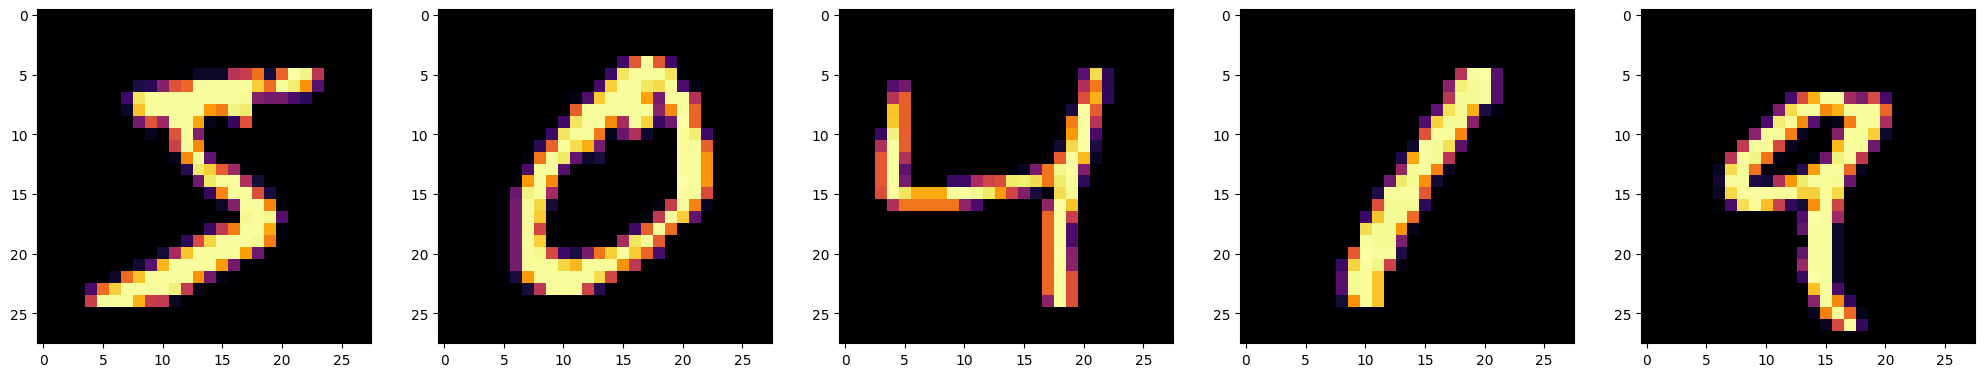

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for i in range(5):
    image = x_train[i].reshape(28, 28)
    axes[i].imshow(image, cmap='inferno')

### Input- en outputtransformaties
We moeten de trainingset omzetten naar een ander formaat. 

We hebben 60000 afbeelding van 28 bij 28 pixels, en gaan deze omzetten naar 60000 vectoren van lengte 784 (= 28 x 28). 

Voor elke afbeelding uit de trainingset kennen we ook het echte cijfer dat getoond wordt op die afbeelding, deze cijfers zitten in y_train. We moeten deze omzetten naar binaire (categorical) vorm.

In [35]:
from keras.utils import to_categorical

x_train = x_train.reshape(-1, 784)
y_train = to_categorical(y_train)

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [36]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Opbouwen van Keras Neuraal Netwerk

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.utils import plot_model
from IPython.core.display import Image

# functional API van keras, sequential mag ook
inputs = Input(shape=(x_train.shape[1],))
x = BatchNormalization()(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs, name='MNIST_Crusher')
model.summary()
# onderstaande werkt niet op DataLore wegens geen installatie van GraphViz
# plot_model(model,to_file='mnist_crusher.png', show_shapes=True)
# display(Image('mnist_crusher.png', width=400, height=400))

### Compilatie van het model

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=keras.losses.categorical_crossentropy,  # voor regressie moet je rmse
    metrics=keras.metrics.categorical_crossentropy
)

### Trainen van het model
*Nota: we gebruiken een extra lib `livelossplot` voor de visualisatie van de training. Deze moet dus geïnstalleerd worden binnen DataLore*

In [ ]:
!pip install livelossplot

In [ ]:
from livelossplot import PlotLossesKeras

history = model.fit(
    x_train,  # training data
    y_train,  # training targets
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=False,
    callbacks=[PlotLossesKeras()]
)

## Testen van NN op testset

We gebruiken ongeziene cijferafbeeldingen uit de testset om te controleren hoe ons neuraal netwerk getraind is.

In [ ]:
x_test = x_test.reshape(-1, 784)
y_test = to_categorical(y_test, num_classes=10)
model.evaluate(x_test, y_test)

We voorspellen de eerste 5 afbeeldingen uit de testset en controleren op de juistheid.

In [ ]:
import numpy as np

print(np.argmax(model.predict(x_test[:5]), axis=1))
print(np.argmax(y_test[:5], axis=1))
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for i in range(5):
    image = x_test[i].reshape(28, 28)
    axes[i].imshow(image, cmap='inferno')